In [268]:
# Credit EDA Case Study
# Author: Ashutosh Kumar, Prabhakaran Chandraseakaran
# Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

In [269]:
# Case Study Problem Statement:

#The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history.
#When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile.

#Two types of risks are associated with the bank’s decision:
#If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
#If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be 
#used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher 
#interest rate, etc. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default


In [270]:
# ######################################### Case Study Starts here ################################################

In [339]:
# Importing required python libraries which will be used for the case study: 

import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
import os
import sys

color = sns.color_palette()

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [340]:
# Importing the dataset for the information of the client at the time of application and building the dataframe:

df_application_data = pd.read_csv("application_data.csv")

In [341]:
# Having first glance of current application data:
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [342]:
# Examining the dataset imported:

#Examining the data frame for the shape, datatypes, NUlls etc
print(df_application_data.shape)
print(df_application_data.info())

# Identify the missing data:

#Finding number of NULLs for each column in dataset:
df_application_data.isnull().sum(axis=0)

#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)
print(round(100*(df_application_data.isnull().sum(axis=0)/len(df_application_data.index)),2))

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE      

In [343]:
# creating a function to identify the missing data in dataset:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [344]:
# Missing data information:
missing_data(df_application_data).head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_AVG             208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738
LANDAREA_MEDI             182590  59.376738

In [345]:
# Finding the datatypes of the columns:
print(df_application_data.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [346]:
# Examine the Distribution of the Target Column:
# The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client 
# had payment difficulties. We can first examine the number of loans falling into each category.

df_application_data['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

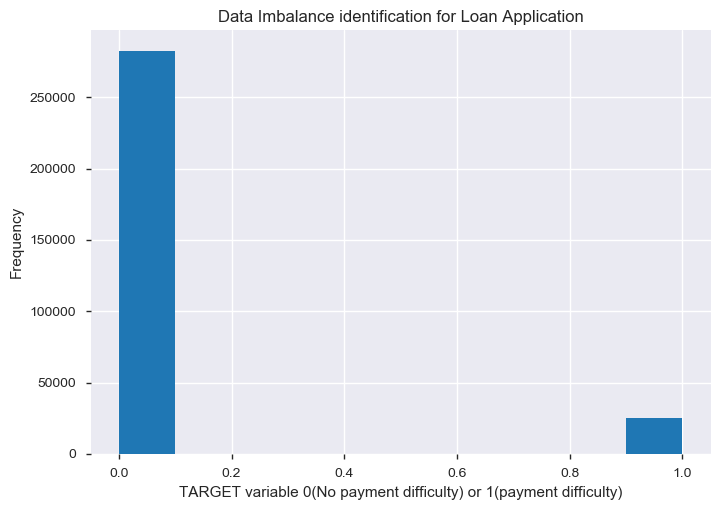

In [347]:
# Plotting the information for visualisation of imbalance wrt to target variable in absolute terms:

plt.title('Data Imbalance identification for Loan Application')
df_application_data['TARGET'].astype(int).plot.hist();
plt.xlabel("TARGET variable 0(No payment difficulty) or 1(payment difficulty)")
#plt.ylabel("Frequency")
plt.show()


In [348]:
# Ques: Identify if there is data imbalance in the data

# Ans: 
# Imbalance problem is the problem in machine learning where the total number of a class of data (positive) is far less 
# than the total number of another class of data (negative)
# Yes there is imbalance problem here in the data as we can see from above plot and data that there are far more loans
# that were repaid on time than loans that were not repaid on time. 


In [349]:
# Ques: Find the ratio of data imbalance:

# Ans:
# # Hence we can conclude the ratio of imabalance is 1138.72
print('The percentage with no payment difficulty is ', round(df_application_data['TARGET'].value_counts()[0]/len(df_application_data) * 100,2), '% of the dataset')
print('The percentage with payment difficulty is ', round(df_application_data['TARGET'].value_counts()[1]/len(df_application_data) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_application_data['TARGET'].value_counts()[0]/df_application_data['TARGET'].value_counts()[1] * 100,2))

The percentage with no payment difficulty is  91.93 % of the dataset
The percentage with payment difficulty is  8.07 % of the dataset
The ratio of imbalance is 1138.72


In [350]:
#Finding the current working directory to save the profiling report of the dataframe:

current_work_directory = os.getcwd()    # Return a string representing the current working directory.
print('Current work directory: {}'.format(current_work_directory))
# Make sure it's an absolute path.
abs_work_directory = os.path.abspath(current_work_directory)
print('Current work directory (full path): {}'.format(abs_work_directory))


Current work directory: C:\Users\Ashutosh
Current work directory (full path): C:\Users\Ashutosh


In [283]:
# Using built-in pandas profiling library for building inline and html report:

#For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:
#Essentials: type, unique values, missing values, Quantile statistics, Descriptive statistics, Most frequent values, Histogram, 
# Correlations highlightings etc:

profile = pf.ProfileReport(df_application_data)
print(display(profile))

#Save the data filing Report to HTML file for future reference, this is in the currennt working directory:
profile.to_file("Credit_Profile.html")

# (Please note that due to huge data set size it is expected that this pandas profiling will run for max upto 5-6 minutes)

None


In [351]:
# Handling the missing data:

# From the pandas profiling report , we have below information that the below pair of columns are having very high corelation, 
# so we will remove one of these column for each pair as keeping both columns is not going to help us in further analysis:
# We are doing deduplication of data here by removing columns which are highly correlated and related to same entity:

# APARTMENTS_MEDI is highly correlated with LIVINGAPARTMENTS_MODE (ρ = 0.93217) Rejected
# APARTMENTS_MODE is highly correlated with LIVINGAPARTMENTS_AVG (ρ = 0.90828) Rejected
# BASEMENTAREA_MEDI is highly correlated with BASEMENTAREA_MODE (ρ = 0.97794) Rejected
# BASEMENTAREA_MODE is highly correlated with BASEMENTAREA_AVG (ρ = 0.9735) Rejected
# COMMONAREA_MEDI is highly correlated with COMMONAREA_MODE (ρ = 0.97989) Rejected
# COMMONAREA_MODE is highly correlated with COMMONAREA_AVG (ρ = 0.97715) Rejected
# ELEVATORS_MEDI is highly correlated with ELEVATORS_MODE (ρ = 0.98283) Rejected
# ELEVATORS_MODE is highly correlated with ELEVATORS_AVG (ρ = 0.97884) Rejected 
# ENTRANCES_MEDI is highly correlated with ENTRANCES_MODE (ρ = 0.98068) Rejected
# ENTRANCES_MODE is highly correlated with ENTRANCES_AVG (ρ = 0.97774) Rejected
# FLOORSMAX_MEDI is highly correlated with FLOORSMAX_MODE (ρ = 0.98824) Rejected
# FLOORSMAX_MODE is highly correlated with FLOORSMAX_AVG (ρ = 0.98569) Rejected
# FLOORSMIN_MEDI is highly correlated with FLOORSMIN_MODE (ρ = 0.98841) Rejected
# FLOORSMIN_MODE is highly correlated with FLOORSMIN_AVG (ρ = 0.98588) Rejected
# LANDAREA_MEDI is highly correlated with LANDAREA_MODE (ρ = 0.98084) Rejected
# LANDAREA_MODE is highly correlated with LANDAREA_AVG (ρ = 0.9737) Rejected
# LIVINGAPARTMENTS_AVG is highly correlated with APARTMENTS_AVG (ρ = 0.94395) Rejected
# LIVINGAPARTMENTS_MEDI is highly correlated with APARTMENTS_MEDI (ρ = 0.94249) Rejected
# LIVINGAPARTMENTS_MODE is highly correlated with APARTMENTS_MODE (ρ = 0.93776) Rejected
# LIVINGAREA_AVG is highly correlated with APARTMENTS_AVG (ρ = 0.91362) Rejected
# LIVINGAREA_MEDI is highly correlated with APARTMENTS_MEDI (ρ = 0.91595) Rejected
# LIVINGAREA_MODE is highly correlated with APARTMENTS_MODE (ρ = 0.91038) Rejected
# NONLIVINGAPARTMENTS_MEDI is highly correlated with NONLIVINGAPARTMENTS_MODE (ρ = 0.97857) Rejected
# NONLIVINGAPARTMENTS_MODE is highly correlated with NONLIVINGAPARTMENTS_AVG (ρ = 0.96937) Rejected
# NONLIVINGAREA_MEDI is highly correlated with NONLIVINGAREA_MODE (ρ = 0.97584) Rejected
# NONLIVINGAREA_MODE is highly correlated with NONLIVINGAREA_AVG (ρ = 0.96609) Rejected
# OBS_60_CNT_SOCIAL_CIRCLE is highly correlated with OBS_30_CNT_SOCIAL_CIRCLE (ρ = 0.99849) Rejected
# REGION_RATING_CLIENT_W_CITY is highly correlated with REGION_RATING_CLIENT (ρ = 0.95084) Rejected
# YEARS_BEGINEXPLUATATION_MEDI is highly correlated with YEARS_BEGINEXPLUATATION_MODE (ρ = 0.96354) Rejected
# YEARS_BEGINEXPLUATATION_MODE is highly correlated with YEARS_BEGINEXPLUATATION_AVG (ρ = 0.97189) Rejected
# YEARS_BUILD_MEDI is highly correlated with YEARS_BUILD_MODE (ρ = 0.98946) Rejected
# YEARS_BUILD_MODE is highly correlated with YEARS_BUILD_AVG (ρ = 0.98944) Rejected
# APARTMENTS_MEDI is highly correlated with APARTMENTS_MODE (ρ = 0.97719) Rejected
# APARTMENTS_MODE is highly correlated with APARTMENTS_AVG (ρ = 0.97326) Rejected
# APARTMENTS_AVG has 156061 / 50.7% missing values Missing
# BASEMENTAREA_AVG has 179943 / 58.5% missing values Missing
# COMMONAREA_AVG has 214865 / 69.9% missing values Missing
# ELEVATORS_AVG has 163891 / 53.3% missing values Missing
# EMERGENCYSTATE_MODE has 145755 / 47.4% missing values Missing
# ENTRANCES_AVG has 154828 / 50.3% missing values Missing
# EXT_SOURCE_1 has 173378 / 56.4% missing values Missing
# FLOORSMAX_AVG has 153020 / 49.8% missing values Missing
# FLOORSMIN_AVG has 208642 / 67.8% missing values Missing
# FONDKAPREMONT_MODE has 210295 / 68.4% missing values Missing
# HOUSETYPE_MODE has 154297 / 50.2% missing values Missing
# LANDAREA_AVG has 182590 / 59.4% missing values Missing
# NONLIVINGAPARTMENTS_AVG has 213514 / 69.4% missing values Missing
# NONLIVINGAREA_AVG has 169682 / 55.2% missing values Missing
# OWN_CAR_AGE has 202929 / 66.0% missing values Missing
# TOTALAREA_MODE has 148431 / 48.3% missing values Missing
# WALLSMATERIAL_MODE has 156341 / 50.8% missing values Missing
# YEARS_BEGINEXPLUATATION_AVG has 150007 / 48.8% missing values Missing
# YEARS_BUILD_AVG has 204488 / 66.5% missing values Missing

# passing these columns as a list and dropping them from dataframe(Removing these columns):

columns = ['YEARS_BUILD_MODE',
'YEARS_BUILD_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_MEDI',
'OBS_30_CNT_SOCIAL_CIRCLE',
'REGION_RATING_CLIENT_W_CITY',
'NONLIVINGAREA_MEDI',
'NONLIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'LIVINGAREA_MEDI',
'LIVINGAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAPARTMENTS_MODE',
'LANDAREA_MODE',
'LANDAREA_MEDI',
'FLOORSMIN_MODE',
'FLOORSMIN_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'ENTRANCES_MODE',
'ENTRANCES_MEDI',
'ELEVATORS_MEDI',
'ELEVATORS_MODE',
'COMMONAREA_MODE',
'COMMONAREA_MEDI',
'BASEMENTAREA_MEDI',
'BASEMENTAREA_MODE',
'APARTMENTS_MEDI',
'APARTMENTS_MODE']

df_application_data.drop(columns, inplace=True, axis=1)

In [352]:
# Handling NULL values:

# Dropping NULL columns based on more than 60 percentage missing values and the relevance of the column on the given use case:
thresh = len(df_application_data) * .4
df_application_data.dropna(thresh = thresh, axis = 1, inplace = True)

In [353]:
# Re-examining the resultant data frame:

print(df_application_data.shape)
print(df_application_data.info())
print(round(100*(df_application_data.isnull().sum(axis=0)/len(df_application_data.index)),2))
print(df_application_data.head())


(307511, 84)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 84 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPU

In [354]:
# Converting the variables DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH etc from negative values into 
# positive for the sake of simplicity and calculations:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in df_application_data.columns if df_application_data[c].dtype in numerics]:
    df_application_data[c] = df_application_data[c].abs()
 

In [355]:
# Removing 4 applications with XNA CODE_GENDER in the dataset as its not valid data for Gender:

df_application_data = df_application_data[df_application_data['CODE_GENDER'] != 'XNA']

In [356]:
# Handling the missing data:

# Now we will create new derived column "TOTAL_DOCUMENT_AVAILABLE" and drop 21 columns with FLAG_DOCUMENT_*:
# We will use this new column for our further analysis as the total number of provided document:


# We can impute with constant zero (0) for the missing values of 13.5 % for the variables related to the "Number of enquiries 
# to Credit Bureau about the client". Since we can assume that there is no call made for these clients:

df_application_data['TOTAL_DOCUMENT_AVAILABLE'] = df_application_data[[
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21',
]].fillna(0).apply(sum, axis=1)

df_application_data.drop(columns=[
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21',
], inplace=True)


In [357]:
# Handling the missing data and creating new derived column:

# Similarly we are creating new derived column "TOTAL_ENQUIRIES" for all enquiries made to credit bureau for each client:
# We are removing individual ENQUIRY columns:

# We can impute with constant zero (0) for the missing values of 13.5 % for the variables related to the "Number of enquiries 
# to Credit Bureau about the client". Since we can assume that there is no call made for these clients:

df_application_data['TOTAL_ENQUIRIES'] = df_application_data[[
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
]].fillna(0).apply(sum, axis=1)


df_application_data.drop(columns=[
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
], inplace=True)


In [358]:
# Number of each type of column
df_application_data.dtypes.value_counts()

float64    24
int64      21
object     15
dtype: int64

In [359]:
# Function to convert the data type to save memory usage by dataframe:

# df_application_data

def convert_types(df):  
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Booleans mapped to integers
        if list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    print('Original memory usage (GB):', original_memory / 1e9 )
    print('New memory usage (GB):', new_memory / 1e9 )
            
    return df

convert_types(df_application_data)

Original memory usage (GB): 0.150063416
New memory usage (GB): 0.109779999


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002    True         Cash loans           M            N   
1           100003   False         Cash loans           F            N   
2           100004   False    Revolving loans           M            Y   
3           100006   False         Cash loans           F            N   
4           100007   False         Cash loans           M            N   
5           100008   False         Cash loans           M            N   
6           100009   False         Cash loans           F            Y   
7           100010   False         Cash loans           M            Y   
8           100011   False         Cash loans           F            N   
9           100012   False    Revolving loans           M            N   
10          100014   False         Cash loans           F            N   
11          100015   False         Cash loans           F            N   
12          100016   False         Cash loans           F            N   
13          100017   False         Cash loans           M            Y   
14          100018   False         Cash loans           F            N   
15          100019   False         Cash loans           M            Y   
16          100020   False         Cash loans           M            N   
17          100021   False    Revolving loans           F            N   
18          100022   False    Revolving loans           F            N   
19          100023   False         Cash loans           F            N   
20          100024   False    Revolving loans           M            Y   
21          100025   False         Cash loans           F            Y   
22          100026   False         Cash loans           F            N   
23          100027   False         Cash loans           F            N   
24          100029   False         Cash loans           M            Y   
25          100030   False         Cash loans           F            N   
26          100031    True         Cash loans           F            N   
27          100032   False         Cash loans           M            N   
28          100033   False         Cash loans           M            Y   
29          100034   False    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
307481      456225    True         Cash loans           M            N   
307482      456226   False         Cash loans           F            Y   
307483      456227   False         Cash loans           F            N   
307484      456228   False         Cash loans           F            Y   
307485      456229   False    Revolving loans           F            N   
307486      456230   False         Cash loans           F            Y   
307487      456231   False         Cash loans           M            N   
307488      456232   False         Cash loans           F            N   
307489      456233    True         Cash loans           F            N   
307490      456234   False         Cash loans           M            N   
307491      456235   False         Cash loans           M            Y   
307492      456236   False         Cash loans           M            Y   
307493      456237   False         Cash loans           F            N   
307494      456238   False         Cash loans           M            Y   
307495      456239   False         Cash loans           M            Y   
307496      456240   False    Revolving loans           F            N   
307497      456241   False         Cash loans           F            Y   
307498      456242   False         Cash loans           M            Y   
307499      456243   False         Cash loans           F            N   
307500      456244   False         Cash loans           F            N   
307501      456245   False         Cash loans           F            N   
307502      456246   False         Cash loans           F            N   
307503      

In [360]:
# Feature engineering to create more new columns for analysis:
# Creating derived columns:

# This ratio should give us inportant info,AMT_ANNUITY is the monthly payment that client will pay towards the credit amount
# Required Ratio : total credit / annuity
df_application_data['AMT_CREDIT_TO_ANNUITY_RATIO'] = df_application_data['AMT_CREDIT'] / df_application_data['AMT_ANNUITY']

# Boolean Field OVER_EXPECT_CREDIT: actual credit larger than goods price
df_application_data['OVER_EXPECT_CREDIT'] = (df_application_data.AMT_CREDIT > df_application_data.AMT_GOODS_PRICE).map({False:0, True:1})

# BIRTH_EMPLOYED_INTERVEL: the days between born and employed, This field suggest any gap between education or employment :
df_application_data['BIRTH_EMPLOYED_INTERVEL'] = df_application_data.DAYS_EMPLOYED - df_application_data.DAYS_BIRTH

# It will show the income per person information for a family:
df_application_data['INCOME_PER_FAMILY_MEMBER'] = df_application_data.AMT_INCOME_TOTAL / df_application_data.CNT_FAM_MEMBERS

# It will show the income to credit ratio:
df_application_data['INCOME_CREDIT_PERC'] = df_application_data['AMT_INCOME_TOTAL'] / df_application_data['AMT_CREDIT']


In [361]:
# Converting from Y , N to boolean values
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL']:
        df_application_data[bin_feature], uniques = pd.factorize(df_application_data[bin_feature])

In [362]:
# examining the change done:
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002    True         Cash loans           M             0   
1      100003   False         Cash loans           F             0   
2      100004   False    Revolving loans           M             1   
3      100006   False         Cash loans           F             0   
4      100007   False         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

          ...          OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0         ...                               2.0                      2.0   
1         ...                               1.0                      0.0   
2         ...                               0.0                      0.0   
3         ...                               2.0                      0.0   
4         ...                               0.0                      0.0   

  DAYS_LAST_PHONE_CHANGE TOTAL_DOCUMENT_AVAILABLE TOTAL_ENQUIRIES  \
0                 1134.0                        1             1.0   
1                  828.0                        1             0.0   
2                  815.0                        0             0.0   
3                  617.0                        1             0.0   
4                 1106.0                        1             0.0   

  AMT_CREDIT_TO_ANNUITY_RATIO  OVER_EXPECT_CREDIT  BIRTH_EMPLOYED_INTERVEL  \
0                   16.461103                   1                    -8824   
1                   36.234085                   1                   -15577   
2                   20.000000                   0                   -18821   
3                   10.532818                   1                   -15966   
4                   23.461618                   0                   -16894   

   INCOME_PER_FAMILY_MEMBER  INCOME_CREDIT_PERC  
0                  202500.0            0.498036  
1                  135000.0            0.208736  
2                   67500.0            0.500000  
3                   67500.0            0.431748  
4                  121500.0            0.236842  

[5 rows x 65 columns]

In [363]:
# Using describe to determine any extreme values in dataframe:
# Traditional descriptive statistics of the columns:

df_application_data.describe()

SK_ID_CURR   FLAG_OWN_CAR  FLAG_OWN_REALTY   CNT_CHILDREN  \
count  307507.000000  307507.000000    307507.000000  307507.000000   
mean   278181.527256       0.340106         0.306331       0.417047   
std    102790.132982       0.473745         0.460970       0.722119   
min    100002.000000       0.000000         0.000000       0.000000   
25%    189146.500000       0.000000         0.000000       0.000000   
50%    278203.000000       0.000000         0.000000       0.000000   
75%    367143.500000       1.000000         1.000000       1.000000   
max    456255.000000       1.000000         1.000000      19.000000   

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075070e+05  3.075070e+05  307495.000000     3.072290e+05   
mean       1.687389e+05  5.988334e+05   27111.048828     5.379812e+05   
std        2.371774e+05  4.024715e+05   14493.276367     3.695426e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH         ...          \
count               307507.000000  307507.000000         ...           
mean                     0.020867   16037.027271         ...           
std                      0.013833    4363.982424         ...           
min                      0.000290    7489.000000         ...           
25%                      0.010006   12413.000000         ...           
50%                      0.018850   15750.000000         ...           
75%                      0.028663   19682.000000         ...           
max                      0.072508   25229.000000         ...           

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306486.000000             306486.000000   
mean                   1.405255                  0.100034   
std                    2.381181                  0.362400   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  TOTAL_DOCUMENT_AVAILABLE  TOTAL_ENQUIRIES  \
count           307506.000000             307507.000000    307507.000000   
mean               962.807617                  0.930167         2.145655   
std                826.892944                  0.344281         2.292656   
min                  0.000000                  0.000000         0.000000   
25%                274.000000                  1.000000         0.000000   
50%                757.000000                  1.000000         2.000000   
75%               1570.000000                  1.000000         3.000000   
max               4292.000000                  4.000000       262.000000   

       AMT_CREDIT_TO_ANNUITY_RATIO  OVER_EXPECT_CREDIT  \
count                307495.000000       307507.000000   
mean                     21.607817            0.646359   
std                       7.824289            0.478100   
min                       8.036674            0.000000   
25%                      15.614473            0.000000   
50%                      20.000000            1.000000   
75%                      27.099985            1.000000   
max                      45.305080            1.000000   

       BIRTH_EMPLOYED_INTERVEL  INCOME_PER_FAMILY_MEMBER  INCOME_CREDIT_PERC  
count            307507.000000              3.075050e+05       307507.000000  
mean              51688.542622              9.310737e+04            0.399660  
std              136764.118922              1.013522e+05            

In [364]:
# Among the numerical values we can find clear outliers for CNT_CHILDREN and DAYS_EMPLOYED:
#The maximum value (besides being positive) is about 1000 years which does not right for days of employment
df_application_data['DAYS_EMPLOYED'].describe()


count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

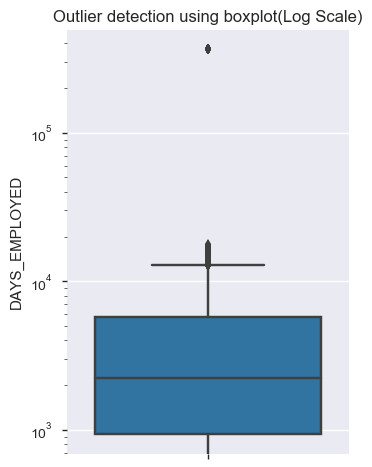

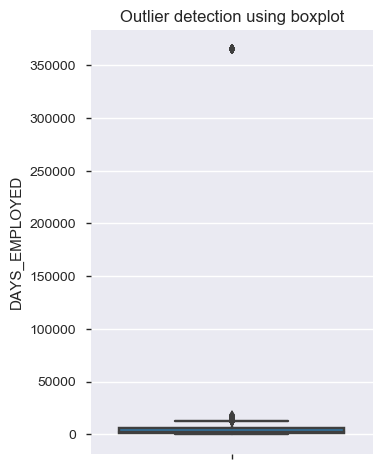

In [365]:
# Using boxplot to identify the outliers in numerical data:

plt.subplot(1,2,1)
plt.title("Outlier detection using boxplot(Log Scale)")
sns.boxplot(y=df_application_data['DAYS_EMPLOYED'])
plt.yscale('log')
plt.show()

plt.subplot(1,2,2)
plt.title("Outlier detection using boxplot")
sns.boxplot(y=df_application_data['DAYS_EMPLOYED'])
plt.show()



In [366]:
 # Finding the outliers in the dataset and treating them:
    
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_application_data = remove_outlier(df_application_data,'DAYS_EMPLOYED')
df_application_data.describe()

# We still have CNT_CHILDREN max value as 19 , but we can ignore the same here it might be a rare valid case

SK_ID_CURR   FLAG_OWN_CAR  FLAG_OWN_REALTY   CNT_CHILDREN  \
count  251150.000000  251150.000000    251150.000000  251150.000000   
mean   278109.373056       0.375122         0.321760       0.500366   
std    102815.709014       0.484155         0.467152       0.763940   
min    100002.000000       0.000000         0.000000       0.000000   
25%    189039.250000       0.000000         0.000000       0.000000   
50%    278031.500000       0.000000         0.000000       0.000000   
75%    367155.500000       1.000000         1.000000       1.000000   
max    456255.000000       1.000000         1.000000      19.000000   

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      2.511500e+05  2.511500e+05  251138.000000     2.508960e+05   
mean       1.759077e+05  6.110550e+05   27811.105469     5.488817e+05   
std        2.593987e+05  4.063652e+05   14645.682617     3.731012e+05   
min        2.565000e+04  4.500000e+04    1980.000000     4.050000e+04   
25%        1.125000e+05  2.779695e+05   17068.500000     2.475000e+05   
50%        1.575000e+05  5.212800e+05   25834.500000     4.500000e+05   
75%        2.115000e+05  8.280000e+05   35617.500000     6.930000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH         ...          \
count               251150.000000  251150.000000         ...           
mean                     0.020891   14741.867071         ...           
std                      0.013874    3642.728424         ...           
min                      0.000290    7489.000000         ...           
25%                      0.010006   11764.000000         ...           
50%                      0.018850   14552.000000         ...           
75%                      0.028663   17522.000000         ...           
max                      0.072508   25180.000000         ...           

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             250304.000000             250304.000000   
mean                   1.398344                  0.097689   
std                    2.379664                  0.358387   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  TOTAL_DOCUMENT_AVAILABLE  TOTAL_ENQUIRIES  \
count           251149.000000             251150.000000    251150.000000   
mean               970.421509                  0.927478         2.116647   
std                826.952820                  0.362964         2.275589   
min                  0.000000                  0.000000         0.000000   
25%                288.000000                  1.000000         0.000000   
50%                762.000000                  1.000000         2.000000   
75%               1577.000000                  1.000000         3.000000   
max               4292.000000                  4.000000       262.000000   

       AMT_CREDIT_TO_ANNUITY_RATIO  OVER_EXPECT_CREDIT  \
count                251138.000000       251150.000000   
mean                     21.526573            0.635118   
std                       7.828349            0.481398   
min                       8.036674            0.000000   
25%                      15.545955            0.000000   
50%                      20.000000            1.000000   
75%                      26.941875            1.000000   
max                      45.305080            1.000000   

       BIRTH_EMPLOYED_INTERVEL  INCOME_PER_FAMILY_MEMBER  INCOME_CREDIT_PERC  
count            251150.000000              2.511480e+05       251150.000000  
mean             -12403.364145              9.374374e+04            0.408332  
std                3578.748061              1.083127e+05            

In [367]:
# Reading the previous application data set which has information about the client’s previous loan data:

df_previous_app_data = pd.read_csv("previous_application.csv")
df_previous_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0            middle  POS mobile with interest   
1         36.0        low_action          Cash X-Sell: low   
2         12.0              high         Cash X-Sell: high   
3         12.0            middle       Cash X-Sell: middle   
4         24.0              high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4                 NaN            NaN                       NaN            NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0            -37.0                       0.0  
1         365243.0                       1.0  
2         365243.0                       1.0  
3           -177.0                       1.0  
4              NaN                       NaN  

[5 rows x 37 columns]

In [368]:
# First glance at this data:

df_previous_app_data.info()
df_previous_app_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

(1670214, 37)

In [369]:
df_previous_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0            middle  POS mobile with interest   
1         36.0        low_action          Cash X-Sell: low   
2         12.0              high         Cash X-Sell: high   
3         12.0            middle       Cash X-Sell: middle   
4         24.0              high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4                 NaN            NaN                       NaN            NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0            -37.0                       0.0  
1         365243.0                       1.0  
2         365243.0                       1.0  
3           -177.0                       1.0  
4              NaN                       NaN  

[5 rows x 37 columns]

In [370]:
# Identify the missing data:

#Finding number of NULLs for each column in dataset:
df_previous_app_data.isnull().sum(axis=0)

#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)
print(round(100*(df_previous_app_data.isnull().sum(axis=0)/len(df_previous_app_data.index)),2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [371]:
# Finding missing data using our function created in this ipynb:
missing_data(df_previous_app_data).head(20)

Total    Percent
RATE_INTEREST_PRIVILEGED    1664263  99.643698
RATE_INTEREST_PRIMARY       1664263  99.643698
RATE_DOWN_PAYMENT            895844  53.636480
AMT_DOWN_PAYMENT             895844  53.636480
NAME_TYPE_SUITE              820405  49.119754
DAYS_TERMINATION             673065  40.298129
NFLAG_INSURED_ON_APPROVAL    673065  40.298129
DAYS_FIRST_DRAWING           673065  40.298129
DAYS_FIRST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION    673065  40.298129
DAYS_LAST_DUE                673065  40.298129
AMT_GOODS_PRICE              385515  23.081773
AMT_ANNUITY                  372235  22.286665
CNT_PAYMENT                  372230  22.286366
PRODUCT_COMBINATION             346   0.020716
AMT_CREDIT                        1   0.000060
SK_ID_CURR                        0   0.000000
NAME_CONTRACT_TYPE                0   0.000000
WEEKDAY_APPR_PROCESS_START        0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000

In [372]:
# Handling NULL values in previous application dataset:

# Dropping NULL columns based on more than 90 percentage missing values:
thresh = len(df_previous_app_data) * .1
df_previous_app_data.dropna(thresh = thresh, axis = 1, inplace = True)

In [373]:
# Combining the application_data with the previous application data to perform final analysis:
# We are merging the current application data with the clients previous application data only for the clients which 
# have currently applied for loan, so using "inner" join here:

from functools import reduce

dataframes = [df_application_data, df_previous_app_data]

df_final_loan_merged = reduce(lambda left, right: pd.merge(left,right.drop_duplicates('SK_ID_CURR'), 
                                                on=['SK_ID_CURR'], how='inner'), dataframes)


In [374]:
# Shape of final merged dataframe:

df_final_loan_merged.shape
df_final_loan_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237539 entries, 0 to 237538
Data columns (total 99 columns):
SK_ID_CURR                      237539 non-null int64
TARGET                          237539 non-null bool
NAME_CONTRACT_TYPE_x            237539 non-null object
CODE_GENDER                     237539 non-null object
FLAG_OWN_CAR                    237539 non-null int64
FLAG_OWN_REALTY                 237539 non-null int64
CNT_CHILDREN                    237539 non-null int64
AMT_INCOME_TOTAL                237539 non-null float32
AMT_CREDIT_x                    237539 non-null float32
AMT_ANNUITY_x                   237527 non-null float32
AMT_GOODS_PRICE_x               237295 non-null float32
NAME_TYPE_SUITE_x               236871 non-null object
NAME_INCOME_TYPE                237539 non-null object
NAME_EDUCATION_TYPE             237539 non-null object
NAME_FAMILY_STATUS              237539 non-null object
NAME_HOUSING_TYPE               237539 non-null object
REGION_POPU

In [375]:
# Creating two list for numeric and categorical columns:

numeric_var_names=[key for key in dict(df_final_loan_merged.dtypes) if dict(df_final_loan_merged.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df_final_loan_merged.dtypes) if dict(df_final_loan_merged.dtypes)[key] in ['object']]

In [376]:
print(type(df_final_loan_merged))

<class 'pandas.core.frame.DataFrame'>


In [377]:
# Renaming columns which are common in both dataset:

df_final_loan_merged=df_final_loan_merged.rename(columns = {'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_CREDIT_x':'AMT_CREDIT'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_CREDIT_y':'AMT_CREDIT_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_ANNUITY_x':'AMT_ANNUITY'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_ANNUITY_y':'AMT_ANNUITY_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_OLD'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START'})
df_final_loan_merged=df_final_loan_merged.rename(columns = {'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_OLD'})

df_final_loan_merged.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002    True         Cash loans           M             0   
1      100003   False         Cash loans           F             0   
2      100004   False    Revolving loans           M             1   
3      100006   False         Cash loans           F             0   
4      100007   False         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

             ...              NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0            ...                   Auto technology        24.0   
1            ...                               XNA        12.0   
2            ...                      Connectivity         4.0   
3            ...                               XNA        48.0   
4            ...              Consumer electronics        18.0   

  NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
0       low_normal      POS other with interest           365243.0   
1       low_normal             Cash X-Sell: low           365243.0   
2           middle  POS mobile without interest           365243.0   
3       low_normal             Cash X-Sell: low           365243.0   
4             high            Cash Street: high           365243.0   

  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0         -565.0                      125.0          -25.0             -17.0   
1         -716.0                     -386.0         -536.0            -527.0   
2         -784.0                     -694.0         -724.0            -714.0   
3         -151.0                     1259.0         -151.0            -143.0   
4         -834.0                     -324.0         -354.0            -347.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 99 columns]

In [378]:
###################### Data Exploration and Visualisation begins ##############################

In [379]:
# Defining functions for plotting of data:

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = df_final_loan_merged[df_final_loan_merged["TARGET"] == 1]
    df0 = df_final_loan_merged[df_final_loan_merged["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(df_final_loan_merged[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 


In [380]:
# Analysis of gender type of applicant:

tr0 = bar_hor(df_final_loan_merged, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In [314]:
# Identifying income type or suit type:

tr0 = bar_hor(df_final_loan_merged, "NAME_TYPE_SUITE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(df_final_loan_merged, "NAME_INCOME_TYPE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

#f975ae
#f125ae

In [315]:
# Family status of applicant:

tr0 = bar_hor(df_final_loan_merged, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f125ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

In [382]:
# Variation of target variable with suit and income type:

tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

In [317]:
# Variation with organization and occupation type:

tr1 = bar_hor(df_final_loan_merged, "ORGANIZATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(df_final_loan_merged, "OCCUPATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Organization Type', 'Applicants Occupation Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=150));
iplot(fig);

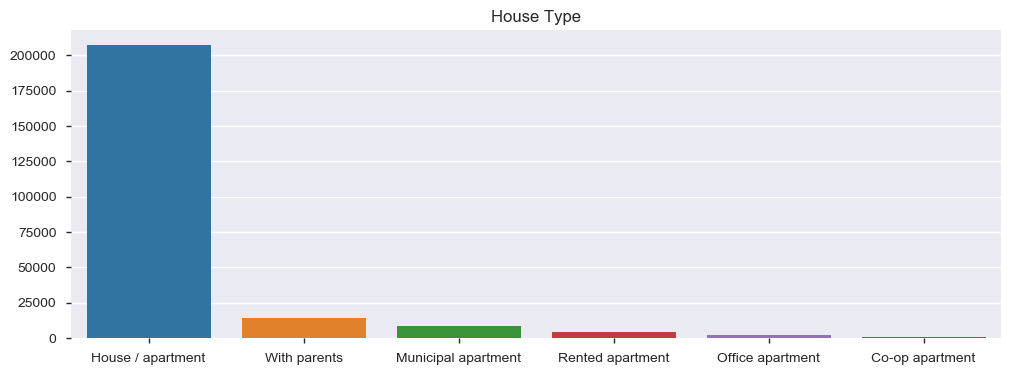

In [318]:
# Analysis the target variable with House Type:

def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
    
plot_categorical(data=df_final_loan_merged, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')    

The required correlation is:
-0.01662537286705358


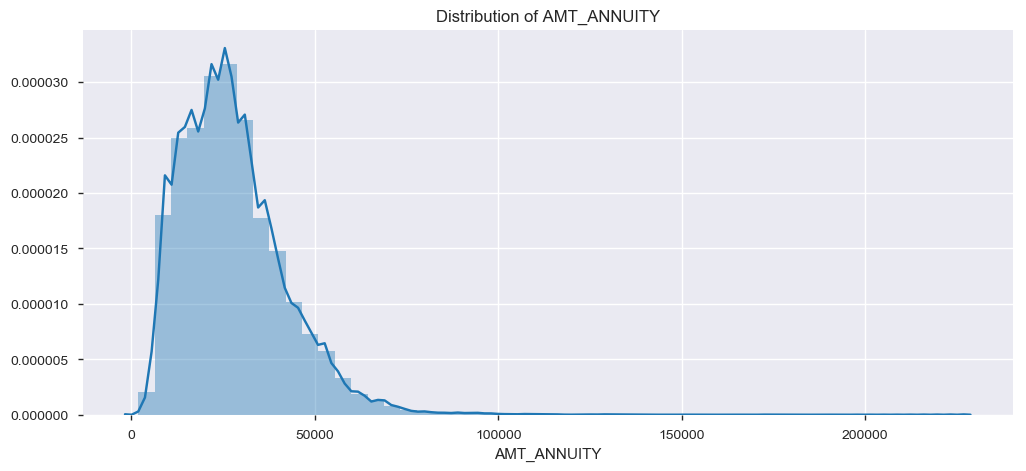

In [319]:
#Distribution of AMT_ANNUITY:

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(df_final_loan_merged["AMT_ANNUITY"].dropna())

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['AMT_ANNUITY'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.038359895323892765


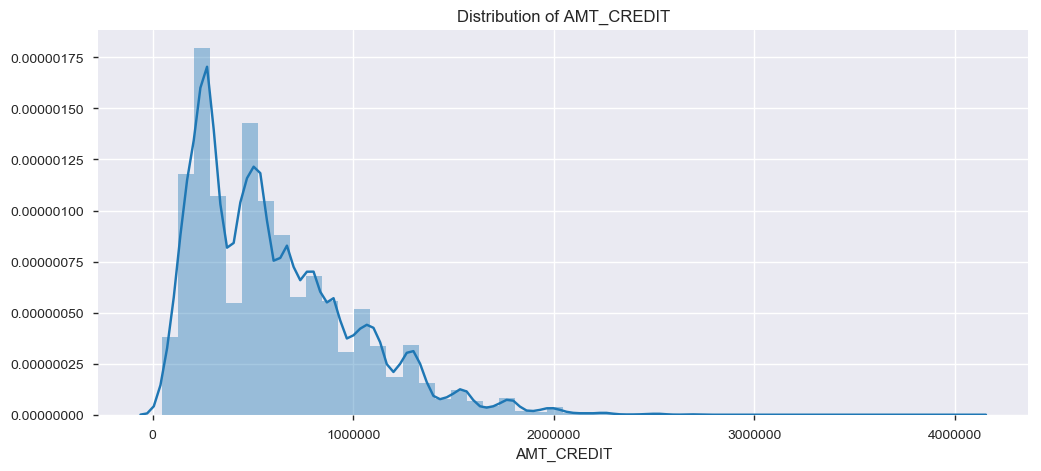

In [320]:
#Distribution of AMT_CREDIT:

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df_final_loan_merged["AMT_CREDIT"])

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['AMT_CREDIT'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.03978436030285452


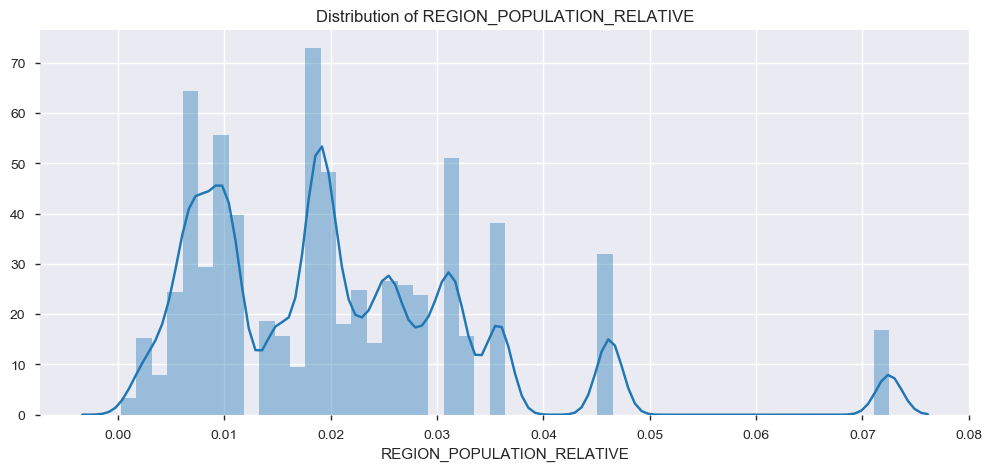

In [321]:
# Distribution of REGION_POPULATION_RELATIVE

plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(df_final_loan_merged["REGION_POPULATION_RELATIVE"])

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['REGION_POPULATION_RELATIVE'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.06615705210968238


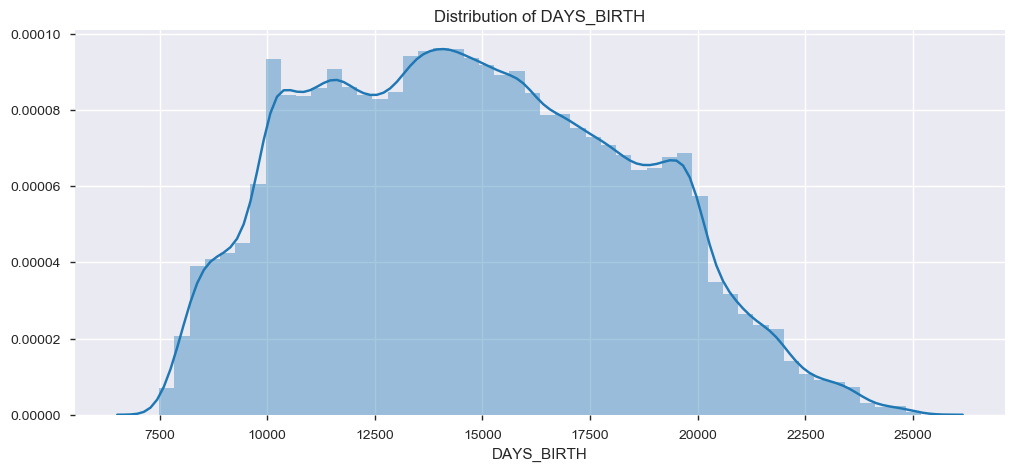

In [322]:
# Distribution of DAYS_BIRTH(Client's age in days at the time of application):

plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(df_final_loan_merged["DAYS_BIRTH"])

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['DAYS_BIRTH'].corr(df_final_loan_merged['TARGET']))

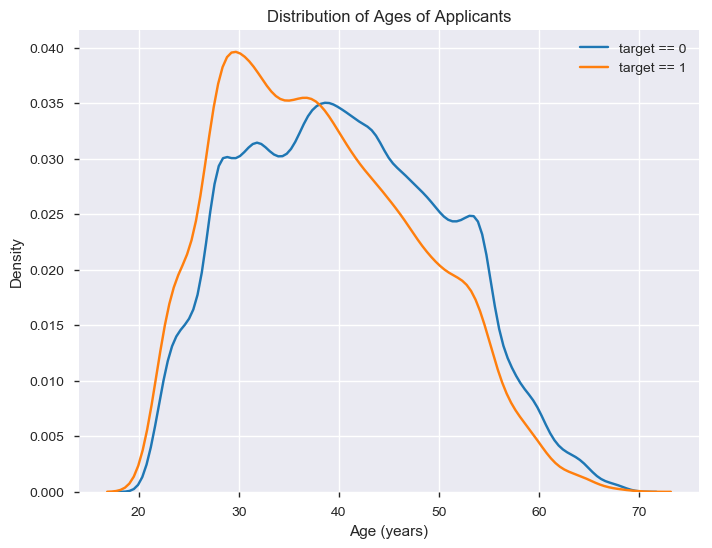

In [323]:
# The above plot does not tell us the clear picture of the parameter "DAYS_BIRTH".
# Also the age information is currently in days which we will convert to years for this analysis here.
# We will use the seaborn kdeplot for this Analysis:

plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages of Applicants');

In [324]:
# The target == 1 curve skews towards the younger end of the range, hence applicants with more age are more likely to repay 
# the loan taken upto some extent as the correlation is weak.

The required correlation is:
-0.03686107720869373


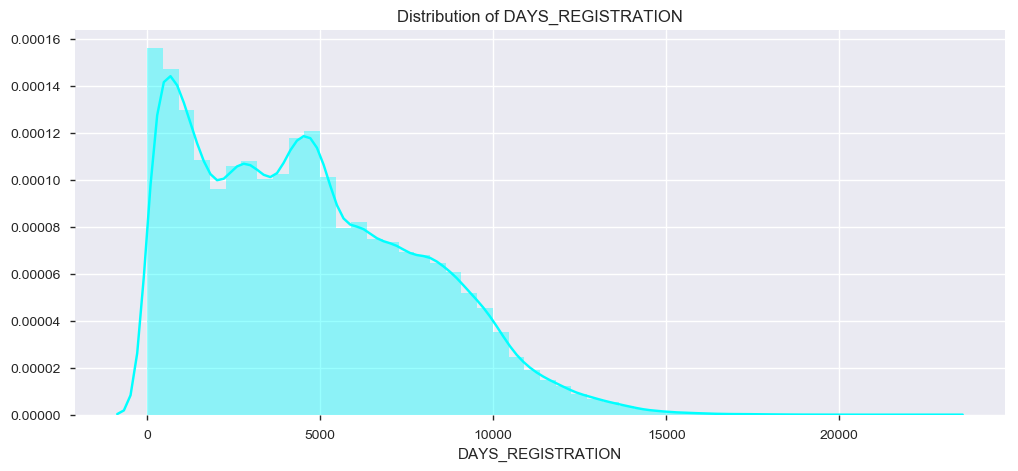

In [325]:
# Distribution of DAYS_REGISTRATION:

plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(df_final_loan_merged["DAYS_REGISTRATION"],color='cyan')

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['DAYS_REGISTRATION'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.07491452423448049


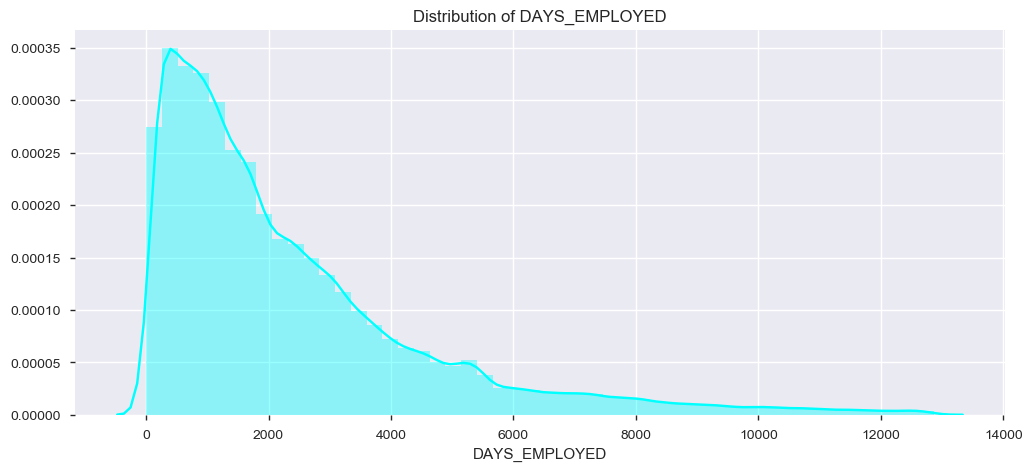

In [326]:
# Distribution of DAYS_EMPLOYED:

plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(df_final_loan_merged["DAYS_EMPLOYED"],color='cyan')

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['DAYS_EMPLOYED'].corr(df_final_loan_merged['TARGET']))

In [327]:
# Who accompanied client when applying for the  application:
# Who accompanied client when applying for the  application:

temp = df_final_loan_merged["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(777, 777, 777)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(777, 777, 777)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(777, 777, 777)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

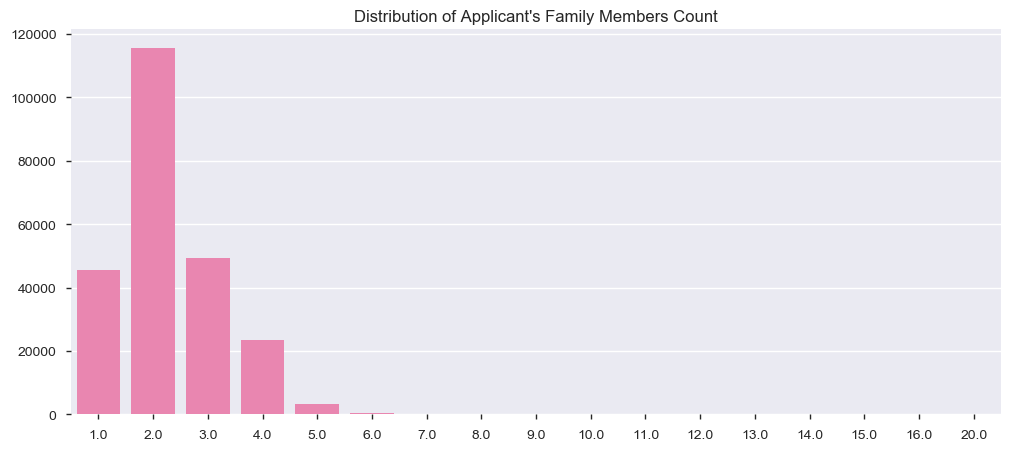

In [328]:
# Distribution of Applicant's Family Members Count

t = df_final_loan_merged["CNT_FAM_MEMBERS"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Family Members Count");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

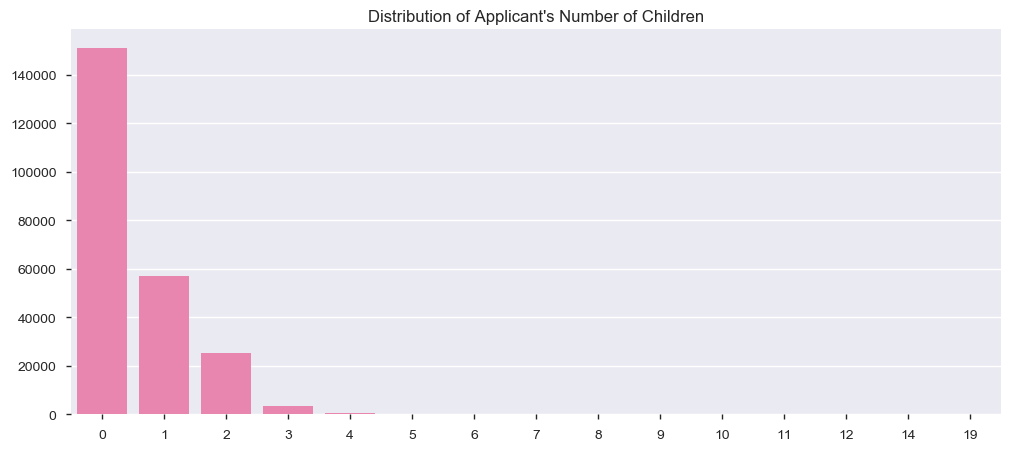

In [329]:
# Distribution of Applicant's Number of Children:

t = df_final_loan_merged["CNT_CHILDREN"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Number of Children");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

The required correlation is:
-0.15562072376653333


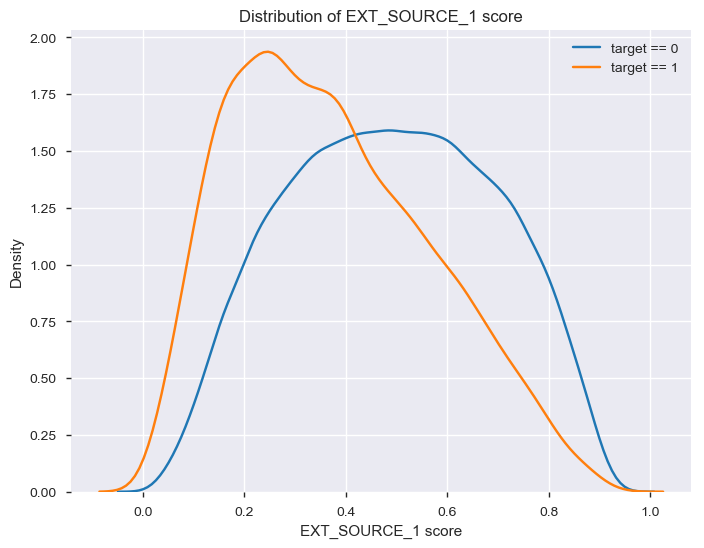

In [330]:
# Analysis of EXT_SOURCE1 data:

plt.figure(figsize = (8, 6))

sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'target == 0')
sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_1 score'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_1 score');

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['EXT_SOURCE_1'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.1701505081491174


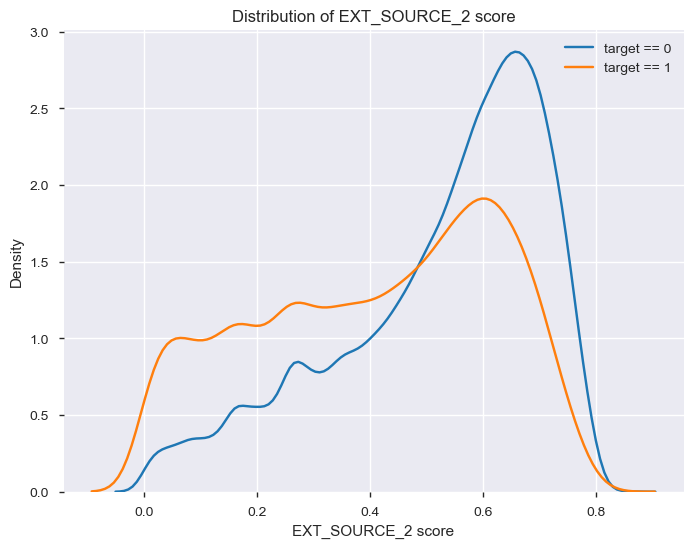

In [331]:
# Analysis of EXT_SOURCE2 data:

plt.figure(figsize = (8, 6))

sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_2 score'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_2 score');

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['EXT_SOURCE_2'].corr(df_final_loan_merged['TARGET']))

The required correlation is:
-0.1785712213070252


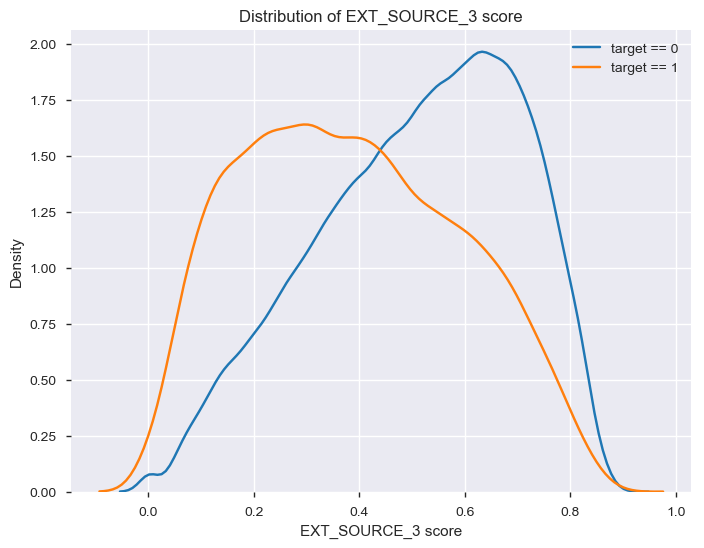

In [332]:
# Analysis of EXT_SOURCE3 data:

plt.figure(figsize = (8, 6))

sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')
sns.kdeplot(df_final_loan_merged.loc[df_final_loan_merged['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_3 score'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_3 score');

# Correlation:
print("The required correlation is:")
print(df_final_loan_merged['EXT_SOURCE_3'].corr(df_final_loan_merged['TARGET']))

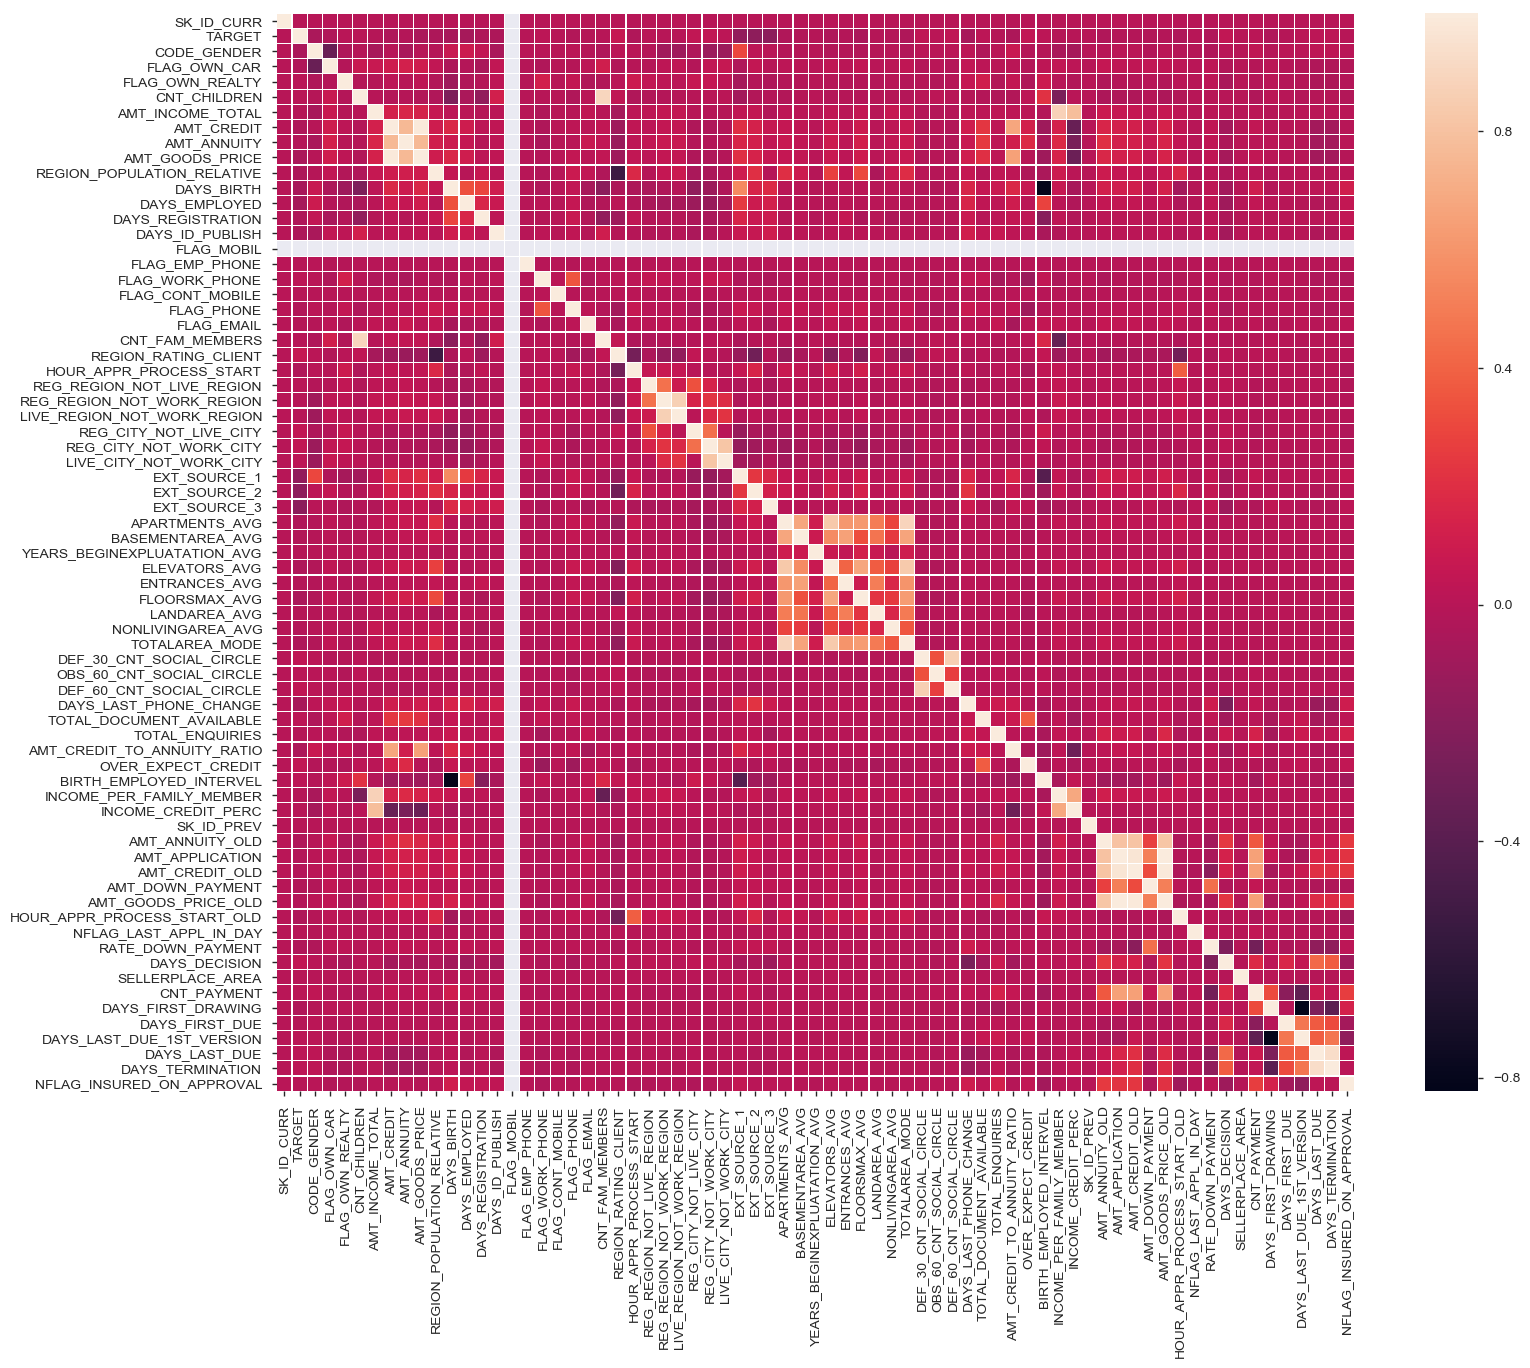

In [333]:
# Checking how the correlation looks like after data cleansing, preparation and engineering:

plt.figure(figsize=(18,14))
sns.heatmap(df_final_loan_merged.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white')
plt.show()


In [334]:
# Find correlations with the target variable and sort for application data:
correlations = df_final_loan_merged.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_WORK_PHONE             0.018768
TOTAL_DOCUMENT_AVAILABLE    0.020595
BIRTH_EMPLOYED_INTERVEL     0.020699
DAYS_LAST_DUE               0.020715
DAYS_TERMINATION            0.020733
LIVE_CITY_NOT_WORK_CITY     0.023531
DEF_60_CNT_SOCIAL_CIRCLE    0.033128
DEF_30_CNT_SOCIAL_CIRCLE    0.034757
DAYS_DECISION               0.038961
OVER_EXPECT_CREDIT          0.041403
REG_CITY_NOT_LIVE_CITY      0.041903
REG_CITY_NOT_WORK_CITY      0.042304
REGION_RATING_CLIENT        0.064646
TARGET                      1.000000
FLAG_MOBIL                       NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                  -0.178571
EXT_SOURCE_2                  -0.170151
EXT_SOURCE_1                  -0.155621
DAYS_EMPLOYED                 -0.074915
DAYS_LAST_PHONE_CHANGE        -0.067110
DAYS_BIRTH                    -0.066157
CODE_GENDER                   -0.051125
AMT_GOODS_PRICE               -0.048144
FLOORSMAX_AVG                 -0.0475

In [335]:
# As evident from the above analysis, below variables are having highest and lowest correlation with target variable:

# Most Negative Correlations:
#EXT_SOURCE_3                  -0.178571
#EXT_SOURCE_2                  -0.170151
#EXT_SOURCE_1                  -0.155621
#DAYS_EMPLOYED                 -0.074915
#DAYS_LAST_PHONE_CHANGE        -0.067110
#DAYS_BIRTH                    -0.066157


# Most Positive Correlations:
#REGION_RATING_CLIENT        0.064646
#REG_CITY_NOT_WORK_CITY      0.042304
#REG_CITY_NOT_LIVE_CITY      0.041903
#OVER_EXPECT_CREDIT          0.041403


# So we will consider these variables along with the target variable for our final analysis:


In [336]:
# Extract important variables and show correlations
imp_data = df_final_loan_merged[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY','OVER_EXPECT_CREDIT']]
imp_data_corrs = imp_data.corr()
imp_data_corrs


TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET                  1.000000     -0.155621     -0.170151     -0.178571   
EXT_SOURCE_1           -0.155621      1.000000      0.231601      0.166497   
EXT_SOURCE_2           -0.170151      0.231601      1.000000      0.118731   
EXT_SOURCE_3           -0.178571      0.166497      0.118731      1.000000   
DAYS_BIRTH             -0.066157      0.556823      0.151783      0.179114   
DAYS_EMPLOYED          -0.074915      0.249118      0.093992      0.128720   
DAYS_LAST_PHONE_CHANGE -0.067110      0.154857      0.217652      0.092667   
REGION_RATING_CLIENT    0.064646     -0.130342     -0.293727     -0.010280   
REG_CITY_NOT_WORK_CITY  0.042304     -0.142942     -0.091438     -0.057202   
OVER_EXPECT_CREDIT      0.041403     -0.011398     -0.030929      0.020987   

                        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_LAST_PHONE_CHANGE  \
TARGET                   -0.066157      -0.074915               -0.067110   
EXT_SOURCE_1              0.556823       0.249118                0.154857   
EXT_SOURCE_2              0.151783       0.093992                0.217652   
EXT_SOURCE_3              0.179114       0.128720                0.092667   
DAYS_BIRTH                1.000000       0.332364                0.145524   
DAYS_EMPLOYED             0.332364       1.000000                0.147153   
DAYS_LAST_PHONE_CHANGE    0.145524       0.147153                1.000000   
REGION_RATING_CLIENT     -0.044767       0.010370               -0.035205   
REG_CITY_NOT_WORK_CITY   -0.111625      -0.128188               -0.065529   
OVER_EXPECT_CREDIT        0.062909       0.012809               -0.002944   

                        REGION_RATING_CLIENT  REG_CITY_NOT_WORK_CITY  \
TARGET                              0.064646                0.042304   
EXT_SOURCE_1                       -0.130342               -0.142942   
EXT_SOURCE_2                       -0.293727               -0.091438   
EXT_SOURCE_3                       -0.010280               -0.057202   
DAYS_BIRTH                         -0.044767               -0.111625   
DAYS_EMPLOYED                       0.010370               -0.128188   
DAYS_LAST_PHONE_CHANGE             -0.035205               -0.065529   
REGION_RATING_CLIENT                1.000000                0.015634   
REG_CITY_NOT_WORK_CITY              0.015634                1.000000   
OVER_EXPECT_CREDIT                 -0.000461                0.009060   

                        OVER_EXPECT_CREDIT  
TARGET                            0.041403  
EXT_SOURCE_1                     -0.011398  
EXT_SOURCE_2                     -0.030929  
EXT_SOURCE_3                      0.020987  
DAYS_BIRTH                        0.062909  
DAYS_EMPLOYED                     0.012809  
DAYS_LAST_PHONE_CHANGE           -0.002944  
REGION_RATING_CLIENT             -0.000461  
REG_CITY_NOT_WORK_CITY            0.009060  
OVER_EXPECT_CREDIT                1.000000

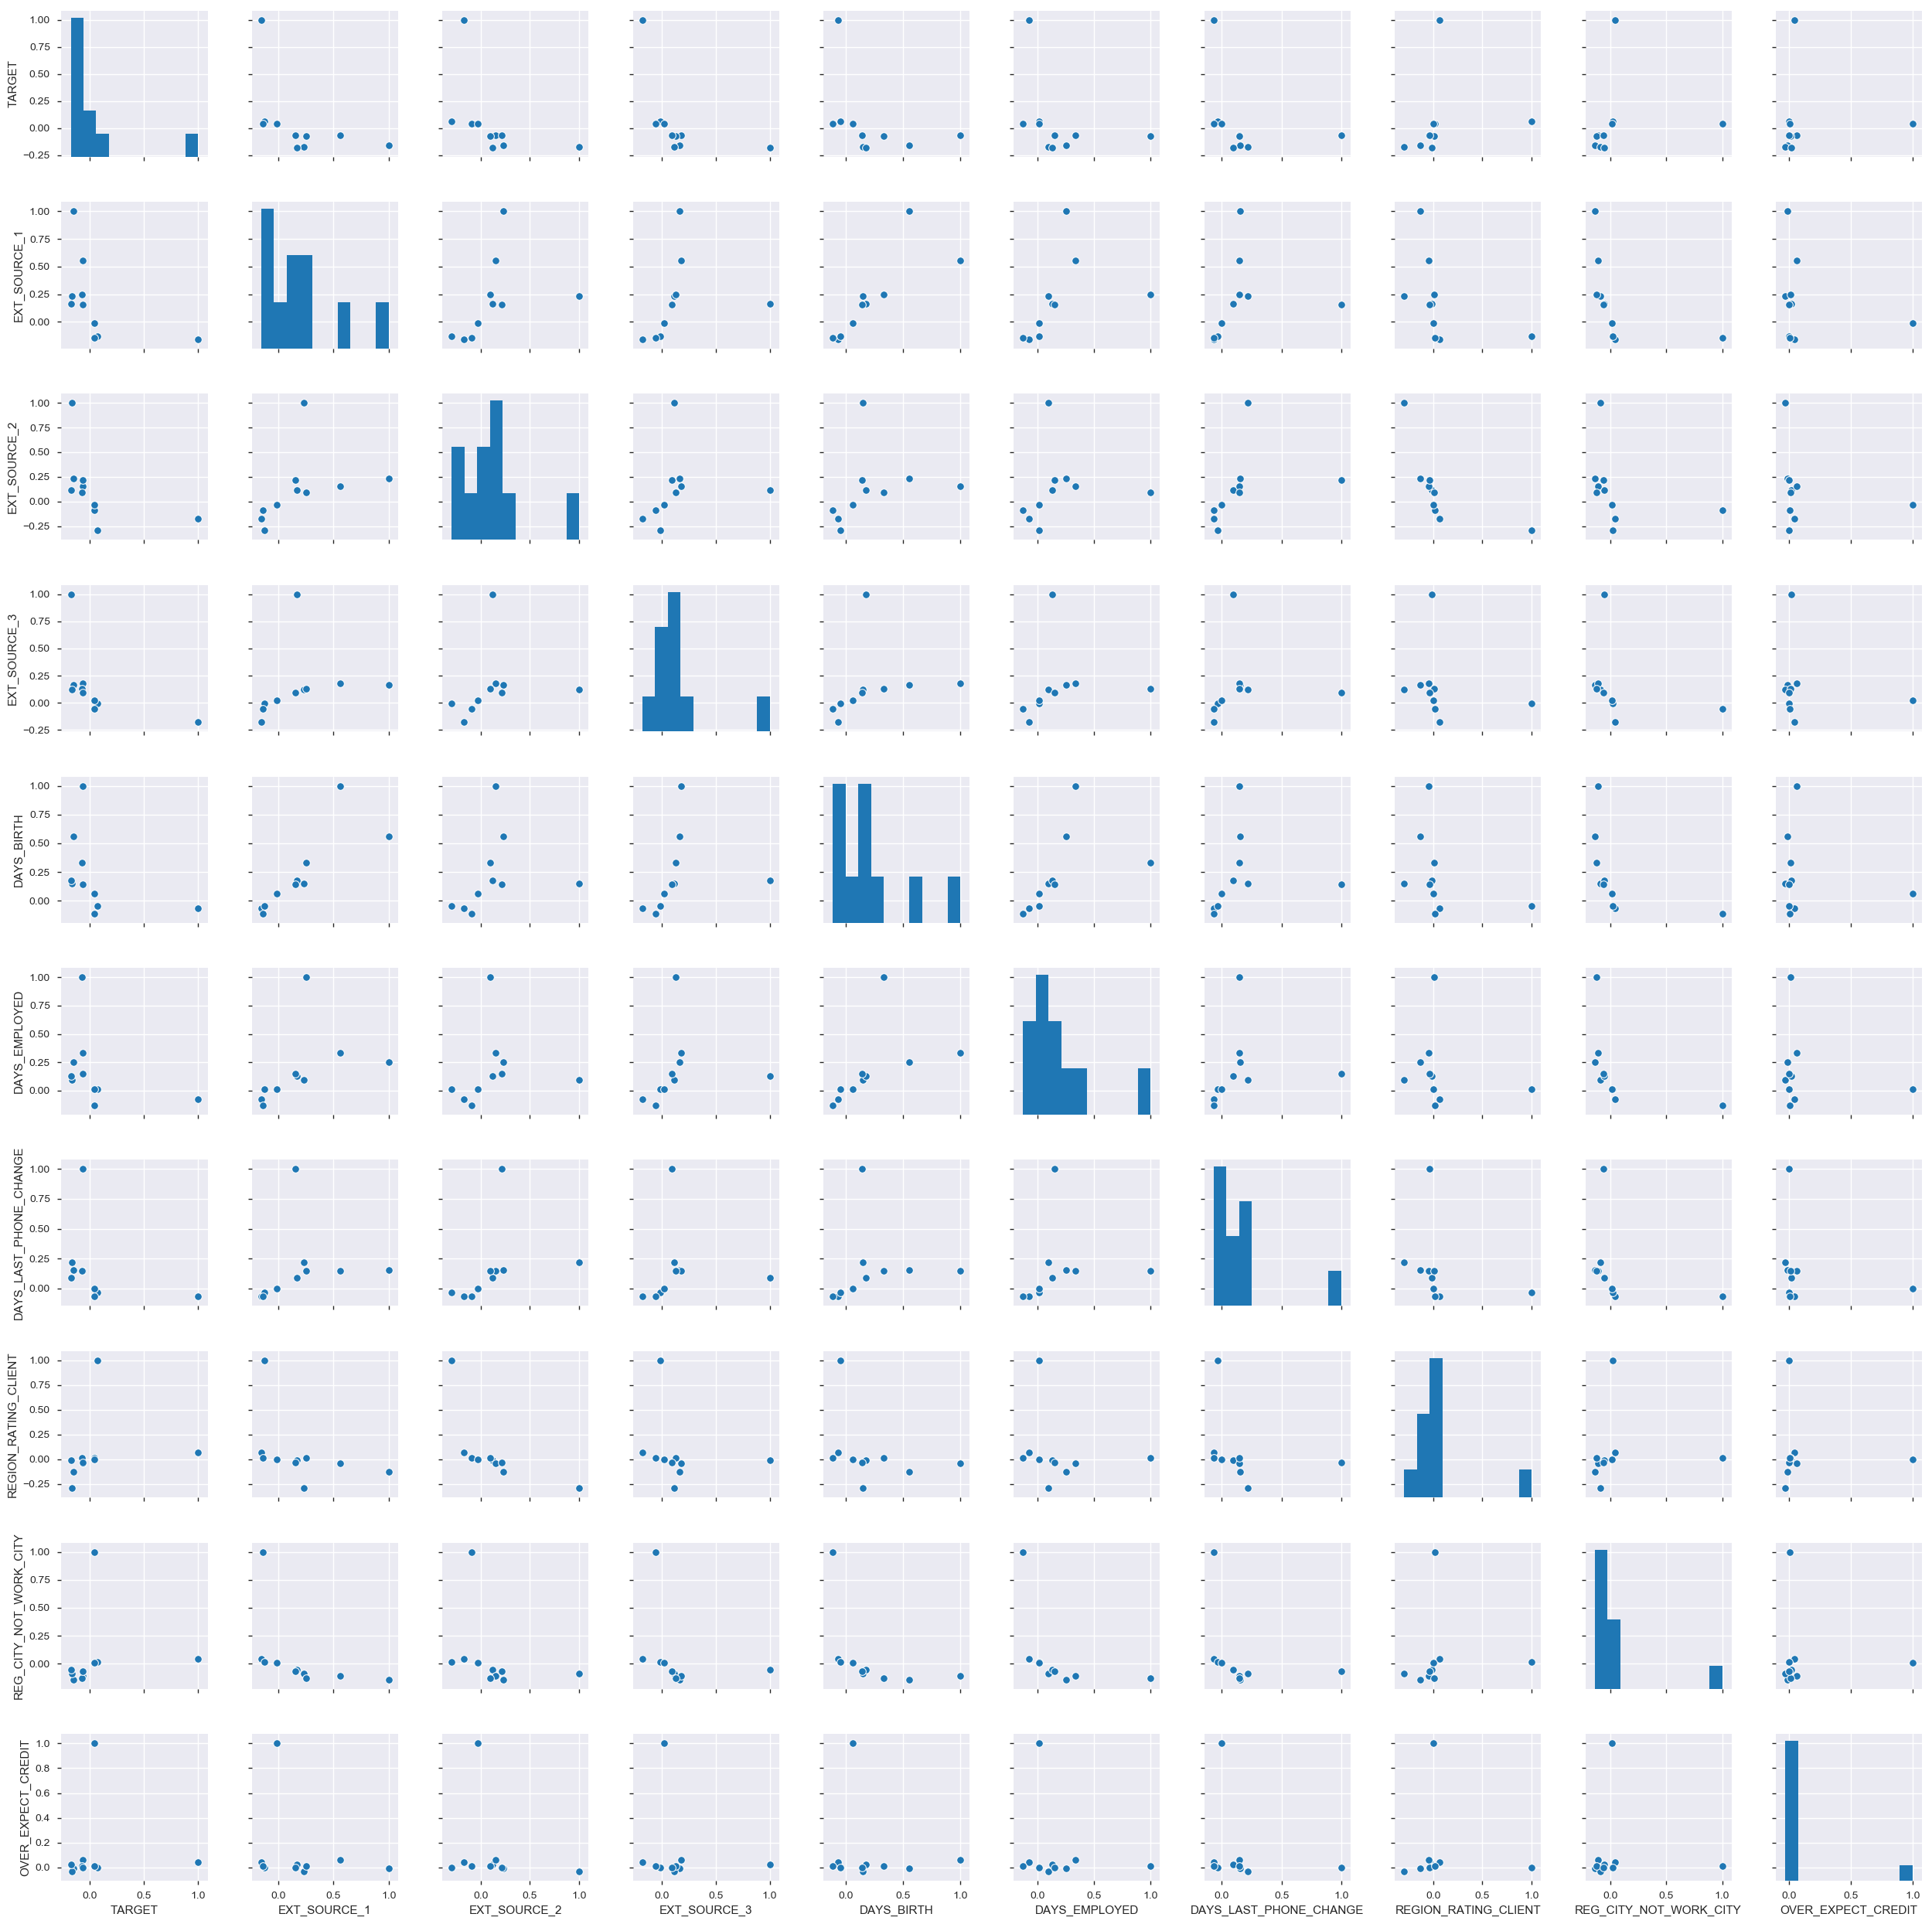

In [337]:
# We will use the pairwise scatter plots to plot the correlation mentioned above with respect to target :

sns.pairplot(imp_data_corrs,palette="husl")
plt.show()

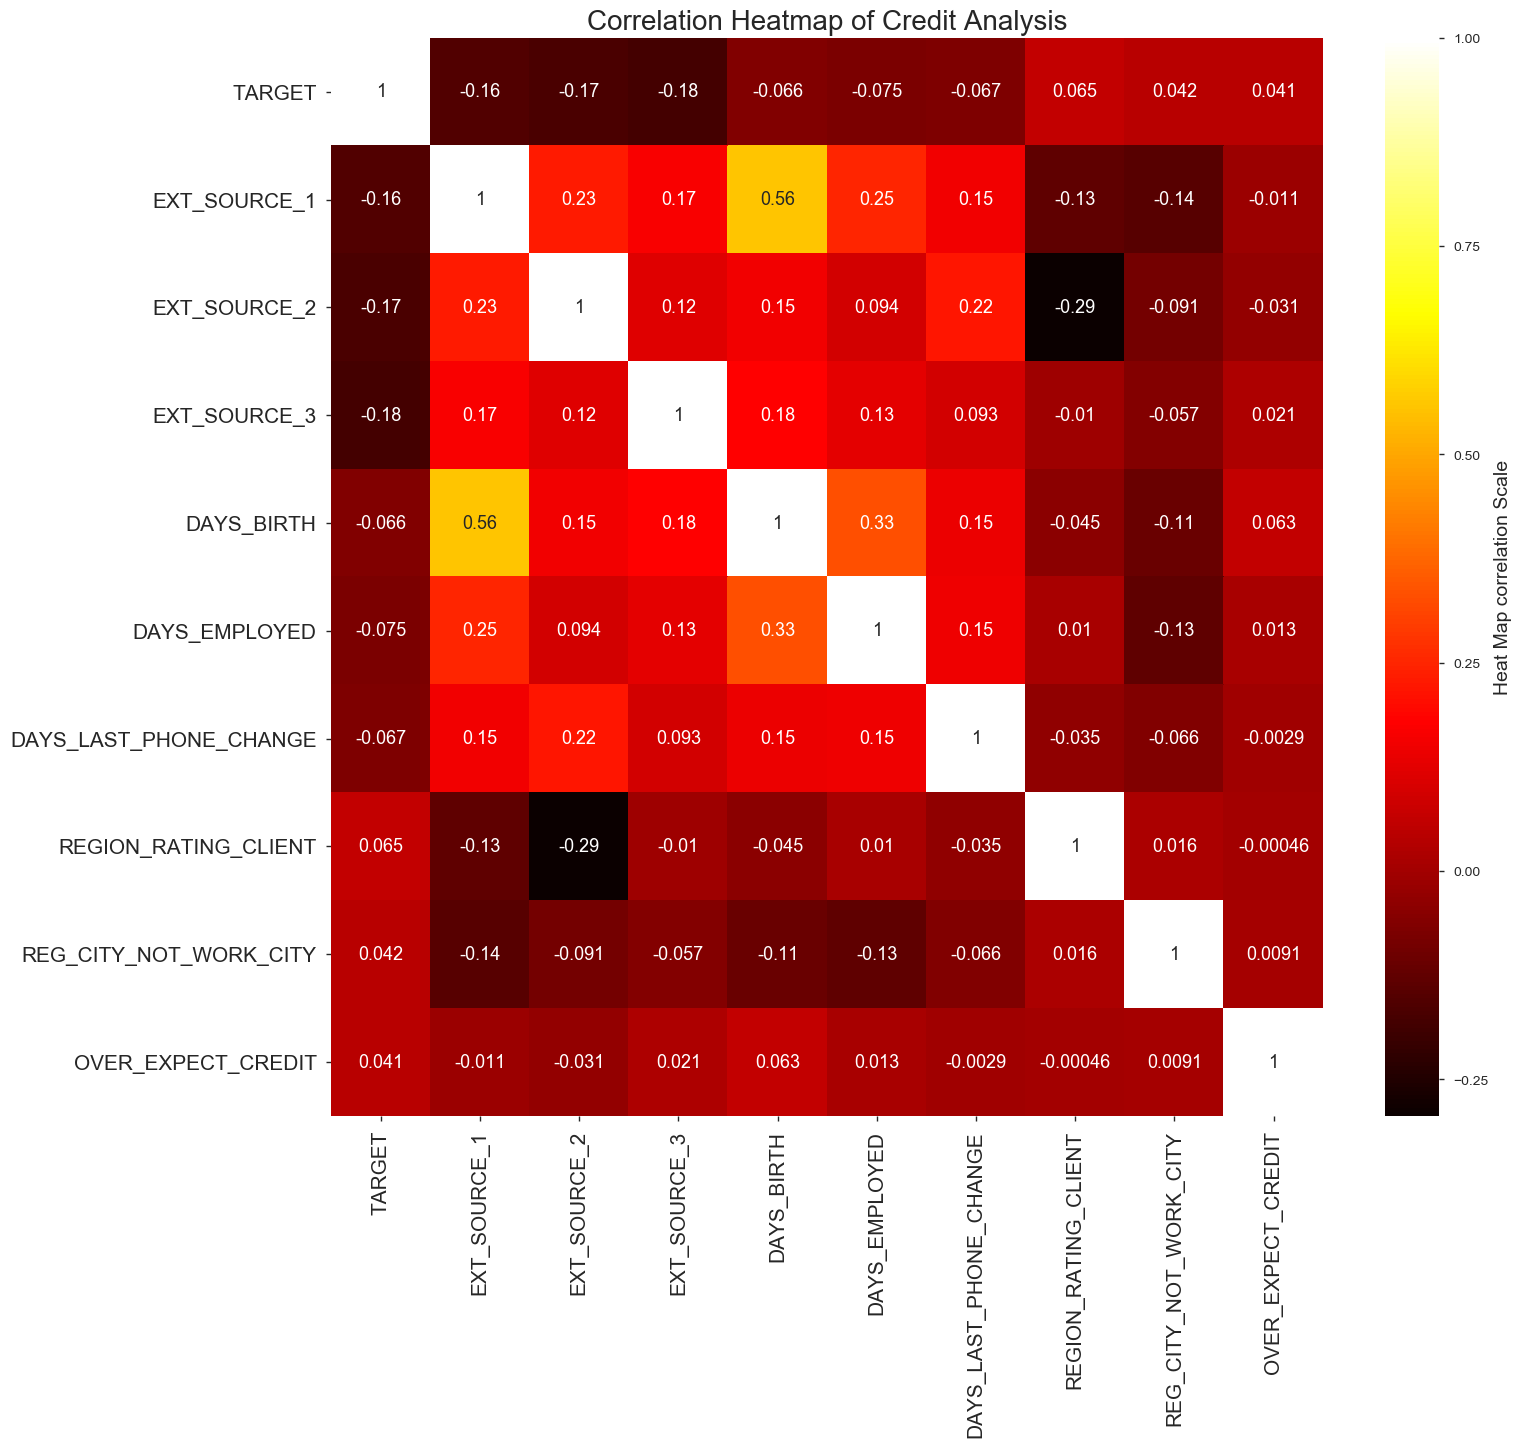

In [338]:
# Plotting the final correlation using the heatmap:

#figure size
plt.figure(figsize=(16,14))
plt.title('Correlation Heatmap of Credit Analysis')

# Heatmap of correlations
# Plotting the required data through seaborn heatmap and Changing the labels, axes, ticks size used in heatmap:
ax = sns.heatmap(imp_data_corrs, cmap = plt.cm.hot,annot = True, annot_kws={"size": 13},cbar_kws={'label': 'Heat Map correlation Scale'})
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(14)

# defining the label and axis font size:
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)

In [ ]:
#Some general interpretations of the absolute value of the correlation coefficent are:

#00-.19 “very weak”
#20-.39 “weak”
#40-.59 “moderate”
#60-.79 “strong”
#80-1.0 “very strong”

In [ ]:
# Conclusion:

# All three EXT_SOURCE features, DAYS EMPLOYEED, DAYS BIRTH of applicants shares the negative correlations with the target, 
# indicating that as the value of these parameters increases, the client is more likely to repay the loan.
# The information obtained from external data source(EXT_SOURCE), the age of applicant (DAYS_BIRTH) and employment duration of
# the applicant (DAYS_EMPLOYEED) is important information in determining if the loan should be granted or not.

# On the other hand,there is a weak positive correlation with REGION_RATING_CLIENT, REG_CITY_NOT_WORK_CITY, REG_CITY_NOT_LIVE_CITY
# and derived variable OVER_EXPECT_CREDIT with the target, as they increase the client is less likely to pay the loan.
# Here, REGION_RATING_CLIENT = rating of the region where client lives, REG_CITY_NOT_WORK_CITY = Flag if client's permanent address 
# does not match work address, REG_CITY_NOT_LIVE_CITY = Flag if client's permanent address does not match contact address,
# OVER_EXPECT_CREDIT = actual credit larger than goods price.
# Hence more risk is involved with increase in any of these parameters, so credit agency should re-consider when any of these 
# variables values is on the higher side.

# Both the positive and negative correlations falls under the category of very weak correlation with the target variable.
    

In [ ]:
# ######################################### Case Study Ends here ################################################